# 1. Importing All the Required Libraries

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 2. Loading Data To Pipeline

In [2]:
data = tf.keras.utils.image_dataset_from_directory('data',batch_size=16)

Found 6000 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [7]:
#get another batch from iterator
batch = data_iterator.next()

In [8]:
#images represented as numpyarrays
batch[0].shape

(16, 256, 256, 3)

- Class 0 - Drowsy driver
- Class 1 - Normal Driving 

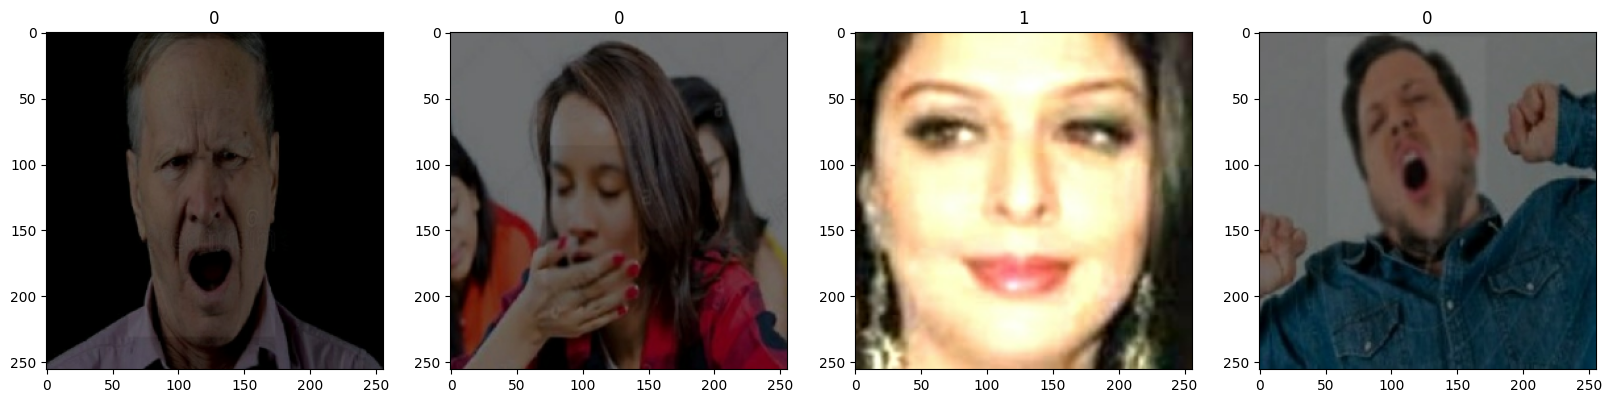

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scaling Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
scaled_it = data.as_numpy_iterator()

In [19]:
batch = scaled_it.next()

In [20]:
batch[0].max()

1.0

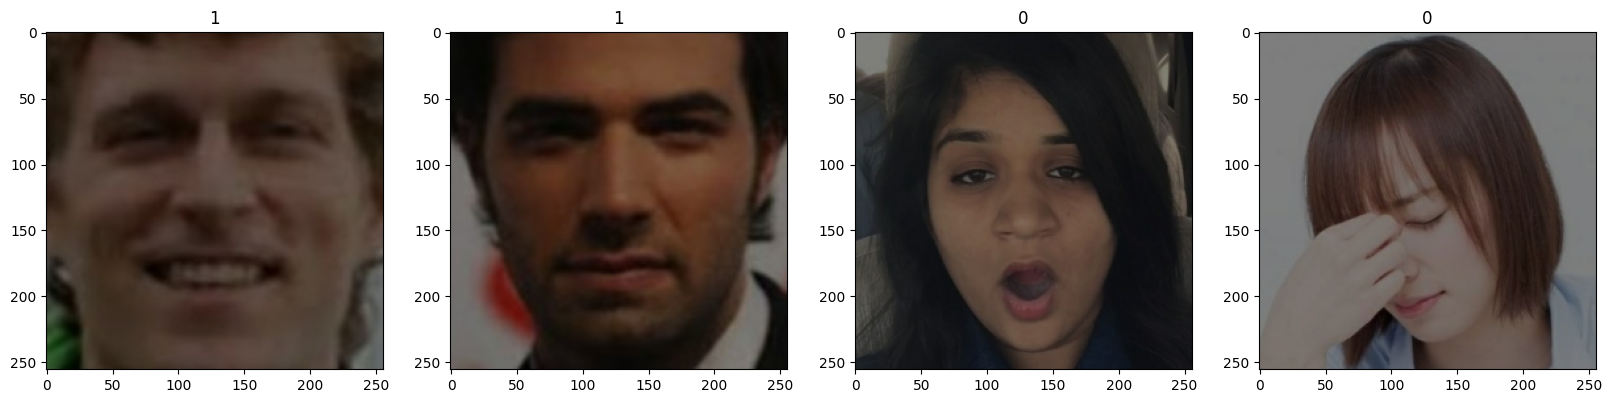

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 4. Splitting Data

In [22]:
len(data)

375

In [23]:
train_size = int(len(data)*.72)
val_size = int(len(data)*.2)
test_size = int(len(data)*.08)

In [24]:
train_size

270

In [25]:
val_size

75

In [26]:
test_size

30

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
print('Test: ',len(test))
print('Validation: ',len(val))
print('Train: ',len(train))

Test:  30
Validation:  75
Train:  270


# 5. Build Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 6. Train

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


270/270 [==============================] - 437s 2s/step - loss: 0.3164 - accuracy: 0.8657 - val_loss: 0.2187 - val_accuracy: 0.9150
Epoch 2/20
270/270 [==============================] - 386s 1s/step - loss: 0.1425 - accuracy: 0.9428 - val_loss: 0.1198 - val_accuracy: 0.9525
Epoch 3/20
270/270 [==============================] - 377s 1s/step - loss: 0.0508 - accuracy: 0.9812 - val_loss: 0.0568 - val_accuracy: 0.9867
Epoch 4/20
270/270 [==============================] - 416s 2s/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0455 - val_accuracy: 0.9850
Epoch 5/20
270/270 [==============================] - 402s 1s/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0596 - val_accuracy: 0.9825
Epoch 6/20
270/270 [==============================] - 407s 2s/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0294 - val_accuracy: 0.9917
Epoch 7/20
270/270 [==============================] - 401s 1s/step - loss: 0.0150 - accuracy: 0.9944 - val_loss: 0.0830 - val_accuracy: 0.97

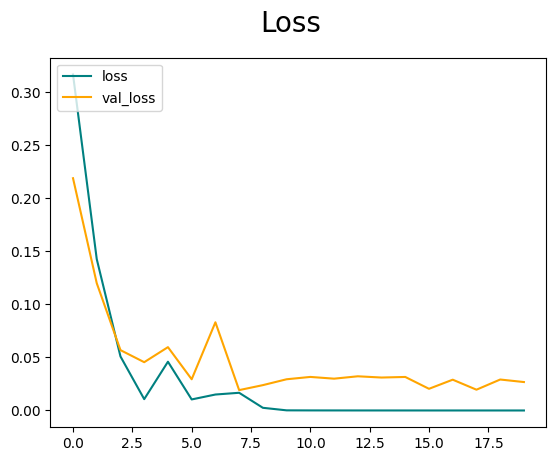

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

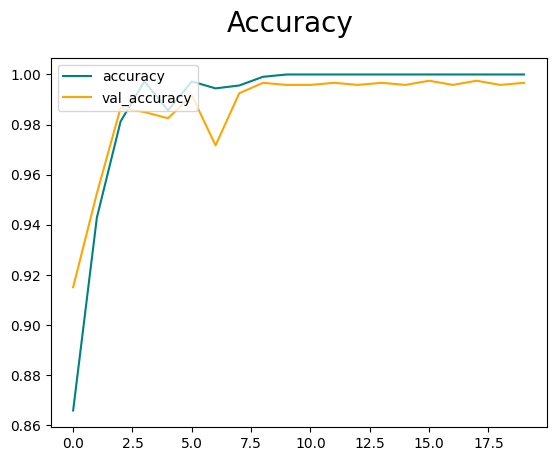

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Saving the model

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model.save(os.path.join('models','driver_violation_v6.h5'))

p:\MachineLearning\DriverBehaviorAnalysisAndViolationDetection\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [ ]:
img = cv2.imread('ca33.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

# Loading a model 

In [ ]:
img = cv2.imread('Test_Images/call.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
new_model = load_model(os.path.join('models','driver_violation.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

## Real time model testing 

In [ ]:
# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

while True:
    # Grab a single frame of video
    ret, frame = video_capture.read()

    # Convert the frame to RGB format
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    resized_frame = tf.image.resize(frame, (256,256))

    new_model.predict(np.expand_dims(resized_frame/255, 0))

    # Display the resulting image
    cv2.imshow('Video', frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()

# Training model on new Data

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, models

In [ ]:
pretrained_model  = load_model(os.path.join('models','driver_violation.h5'))

In [ ]:
# To freeze some layers of the pre-trained model to prevent them from being updated during fine-tuning
for layer in pretrained_model.layers:
    layer.trainable = False

In [ ]:
# Remove the last layer
pretrained_model.pop()

In [ ]:
new_model = models.Sequential([
    pretrained_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Adjust num_classes based on your new dataset
])

In [ ]:
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model.summary()

In [ ]:
new_data = tf.keras.utils.image_dataset_from_directory('new_data',batch_size=16)

In [ ]:
data_iterator = new_data.as_numpy_iterator()
batch = data_iterator.next()
batch[0].shape

In [ ]:
new_data = new_data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_it = new_data.as_numpy_iterator()
batch = scaled_it.next()
batch[0].max()

In [ ]:
len(new_data)

In [ ]:
train_size = int(len(new_data)*.72)+1
val_size = int(len(new_data)*.3)

In [ ]:
train_size

In [ ]:
val_size

In [ ]:
train = new_data.take(train_size)
val = new_data.skip(train_size).take(val_size)

In [ ]:
new_model.fit(train, epochs=100, validation_data=val)

In [ ]:
new_model.save(os.path.join('models','driver_violation_v2.h5'))

In [ ]:
img = cv2.imread('captured_images/captured_image_1709974888.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat